In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/contentgdrive')
path = "/contentgdrive/MyDrive/"

method = [cv2.THRESH_TRIANGLE  ]
names = ['Object Counting']


Drive already mounted at /contentgdrive; to attempt to forcibly remount, call drive.mount("/contentgdrive", force_remount=True).


Drive already mounted at /contentgdrive; to attempt to forcibly remount, call drive.mount("/contentgdrive", force_remount=True).
Threshold: 176.0
Counting using dilation =  20
Counting using closing =  20


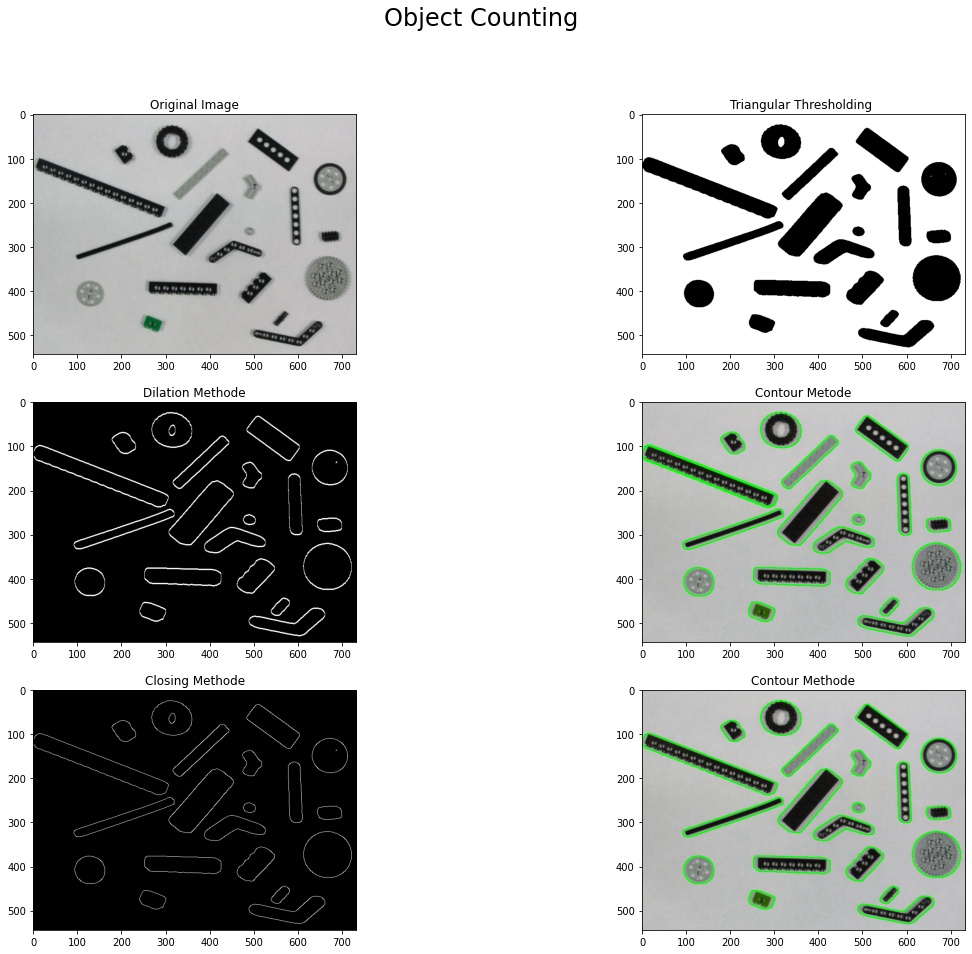

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/contentgdrive')
path = "/contentgdrive/MyDrive/"

method = [cv2.THRESH_TRIANGLE  ]
names = ['Object Counting']

def thresh( method, index):

    img = cv2.imread(path + '/Lego.jpg')
    
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    ret, img_masked = cv2.threshold(blurred, 0, 255, method)
    print(f"Threshold: {ret}")

    canny = cv2.Canny(img_masked, 0, ret, 3 )

    
    dilation = cv2.dilate(canny , (2,2), iterations=2)
    closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4))


    (cnt, hierarchy) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
    print("Counting using dilation = ", len(cnt))

    
    (cnt1, hierarchy) = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb1, cnt1, -1, (0, 255, 0), 2)
    print("Counting using closing = ", len(cnt1))
    text1= "Original image"

    fig, ax = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle(names[index], fontsize=24)
    ax[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax[0,0].title.set_text('Original Image')
    ax[0,1].imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)), ax[0,1].title.set_text('Triangular Thresholding ')
    ax[1,0].imshow(dilation, cmap='gray'), ax[1,0].title.set_text('Dilation Methode')
    ax[1,1].imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)), ax[1,1].title.set_text('Contour Metode')
    ax[2,0].imshow(closing, cmap='gray'), ax[2,0].title.set_text('Closing Methode')
    ax[2,1].imshow(cv2.cvtColor(rgb1, cv2.COLOR_BGR2RGB)), ax[2,1].title.set_text('Contour Methode')
    
    

for index, method in enumerate(method):
    thresh( method, index)

In [ ]:
image = cv2.imread(path + '/coins.jpg')

# Convert the image to grayscale
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

iRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(iRGB, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 2)


In [ ]:
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY)
canny = cv2.Canny(thresh, 0, ret, 3 )


# Perform morphological operations
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4))

0


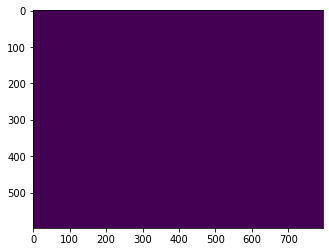

In [ ]:
contours, _ = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Print the number of objects in the image
print(len(contours))
plt.imshow(opening)

In [ ]:
image = cv2.imread(path + 'A_blue_eye.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image using Otsu's thresholding
threshold, binarized = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)